### Analysis of the new, 4-month data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
from collections import Counter

#### 1. Read data.

In [2]:
df = pd.read_csv('plc-2021-04-14.csv', low_memory=False)
df.head()

,opc_node_id,crane_id,timestamp,value
0,Overall-Fault reset,P1,2020-12-15 02:21:34,FALSE
1,Overall-Normal / Special,P1,2020-12-15 02:21:34,FALSE
2,Luffing-Deceleration limit for decreasing ampl...,P1,2020-12-15 02:21:34,TRUE
3,Luffing-Decreasing amplitude limit,P1,2020-12-15 02:21:34,TRUE
4,Luffing-Braking unit fault,P1,2020-12-15 02:21:34,FALSE


#### 2. Plot OPC nodes by subsystem and hour.

In [39]:
keyword = 'Travel'
df_luffing = df[df['opc_node_id'].str.contains(keyword, na=False)]
timestamps_luffing = df_luffing['timestamp']
time_structs_luffing = []
for ts in timestamps_luffing:
    time_end = datetime.datetime.strptime(ts, "%Y-%m-%d %H:%M:%S").timetuple()
    time_structs_luffing.append(time_end)

In [40]:
hours_consecutive = []
days = []
hours_ = []
for ts in time_structs_luffing:
    day = ts.tm_yday
    if day not in days:
        days.append(day)
    hour = ts.tm_hour
    if hour not in hours_:
        hours_.append(hour)
        hours_.sort()
    day_idx = days.index(day)
    hour_idx = hours_.index(hour)
    hours_consecutive.append(str(day_idx)+'_'+str(hour_idx))
hours_consecutive_counter = Counter(hours_consecutive)

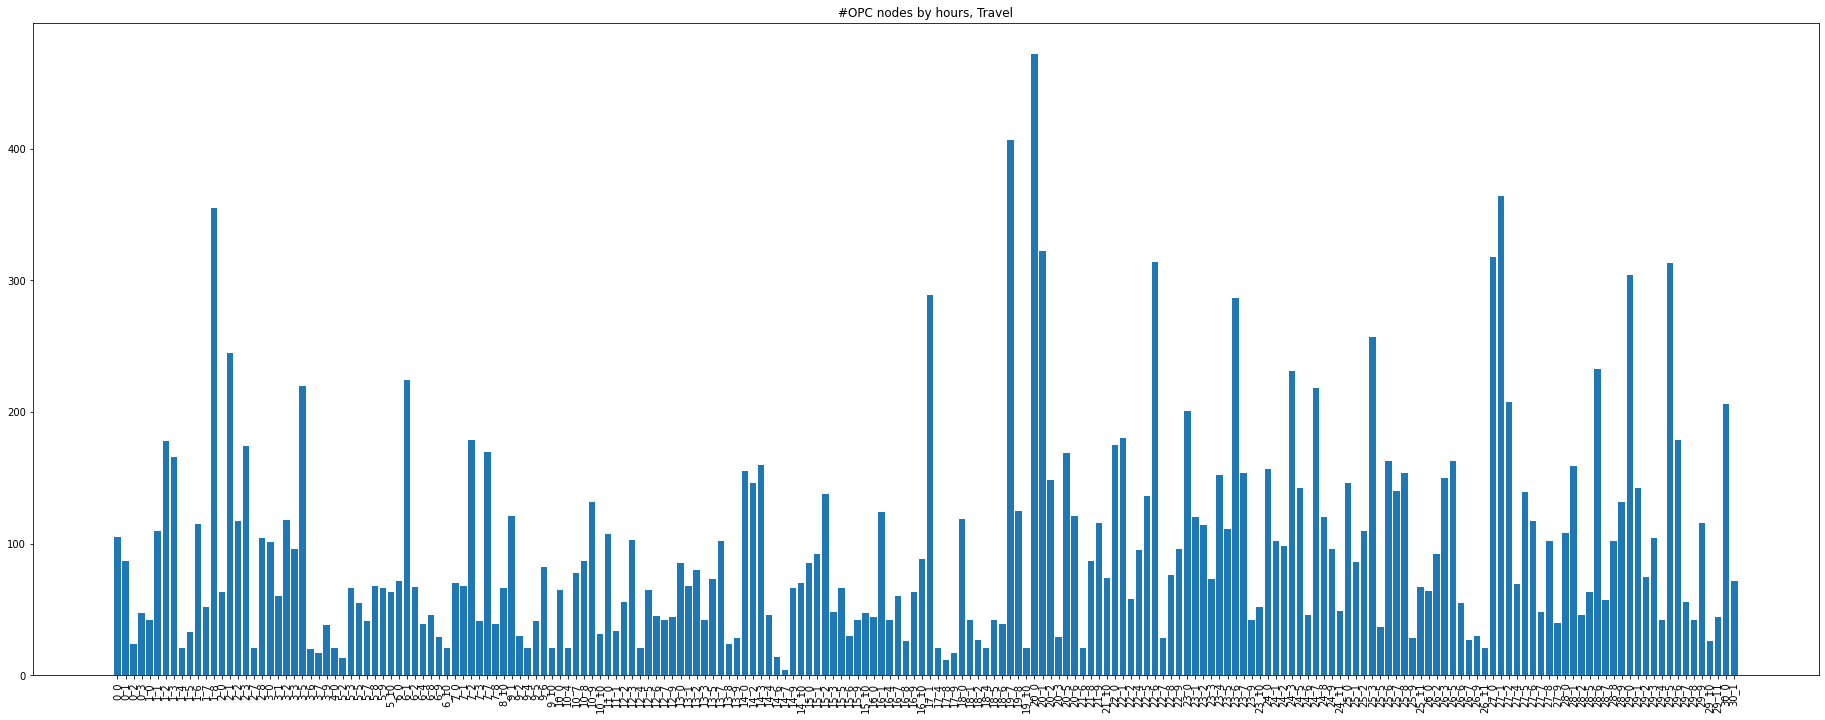

In [41]:
plt.rcParams["figure.figsize"]=(32, 12)
plt.bar(list(hours_consecutive_counter.keys()), list(hours_consecutive_counter.values()))
title = '#OPC nodes by hours, '+keyword
plt.title(title)
plt.xticks(rotation=90)
plt.savefig(title+'.png', dpi=400)

#### 3. Plot overall OPC nodes without gaps.

In [3]:
timestamps = df['timestamp']

In [6]:
time_structs = []
for ts in timestamps:
    time_end = datetime.datetime.strptime(ts, "%Y-%m-%d %H:%M:%S").timetuple()
    time_structs.append(time_end)

In [14]:
# hour consecutive
hours_consecutive = []
days = []
hours_ = []
for ts in time_structs:
    day = ts.tm_yday
    if day not in days:
        days.append(day)
    hour = ts.tm_hour
    if hour not in hours_:
        hours_.append(hour)
        hours_.sort()
    day_idx = days.index(day)
    hour_idx = hours_.index(hour)
    hours_consecutive.append(str(day_idx)+'_'+str(hour_idx))
hours_consecutive_counter = Counter(hours_consecutive)

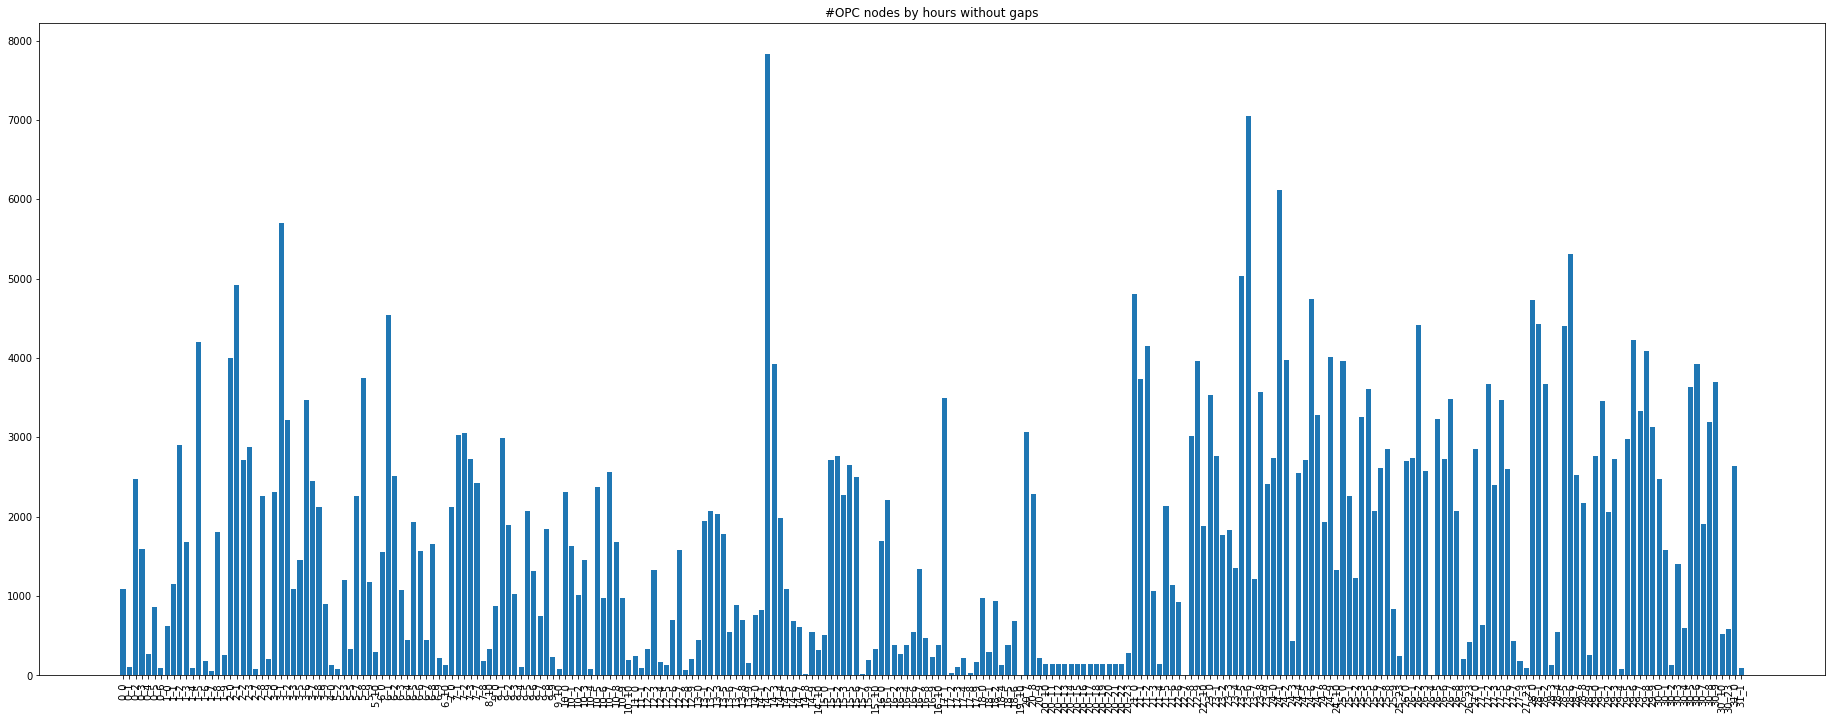

In [22]:
plt.rcParams["figure.figsize"]=(32, 12)
plt.bar(list(hours_consecutive_counter.keys()), list(hours_consecutive_counter.values()))
title = '#OPC nodes by hours without gaps'
plt.title(title)
plt.xticks(rotation=90)
plt.savefig(title+'.png', dpi=400)

In [47]:
# hour
hours = []
for ts in time_structs:
    hours.append(ts.tm_hour)
hour_counter = Counter(hours)

In [72]:
#yday # year day
ydays = []
for ts in time_structs:
    ydays.append(ts.tm_yday if ts.tm_yday < 200 else ts.tm_yday - 365)
yday_counter = Counter(ydays)

In [70]:
ydays_short = []
for y in ydays:
    if y <= 11:
        ydays_short.append(y)
    if y >= 89:
        ydays_short.append(y-70)

In [29]:
weeks = []
for ts in time_structs:
    weeks.append((ts.tm_yday/7))
week_counter = Counter(weeks)

In [34]:
wdays = []
for ts in time_structs:
    wdays.append(ts.tm_wday)
wdays_counter = Counter(wdays)
months = []
for ts in time_structs:
    months.append(ts.tm_mon)

#### 4. Plot overall OPC nodes by days without gaps.

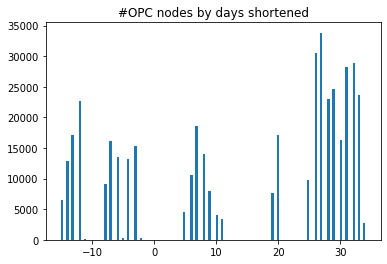

In [71]:
plt.hist(ydays_short, bins=120)
title = '#OPC nodes by days shortened'
plt.title(title)
# plt.savefig(title+'.png', dpi=200)

In [48]:
# plt.rcParams["figure.figsize"]=(16, 12)
# plt.hist(hours, bins=24)
# title = '#OPC nodes by hour'
# plt.title(title)
# plt.xticks(np.arange(0, 24, 1.0))
# # plt.xticks(rotation=90)
# plt.savefig(title+'.png', dpi=200)

#### 5. Plot overall OPC nodes by days.

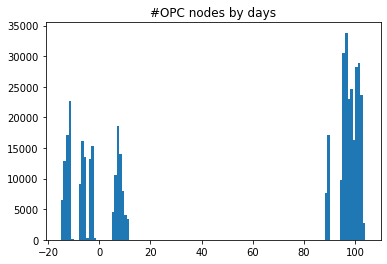

In [62]:
# plt.hist(ydays, bins=120)
# title = '#OPC nodes by days'
# plt.title(title)
# # plt.xticks(np.arange(0, 366, 1.0))
# # # plt.xticks(rotation=90)
# plt.savefig(title+'.png', dpi=200)

#### 6. Plot overall OPC nodes by weeks.

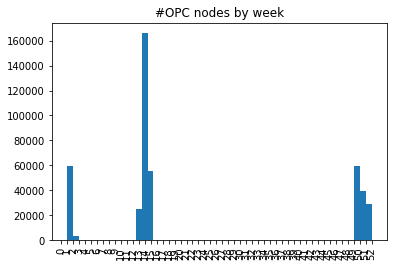

In [23]:
# plt.rcParams["figure.figsize"]=(16, 12)
# plt.hist(weeks, bins=53)
# title = '#OPC nodes by week'
# plt.title(title)
# plt.xticks(np.arange(0, 53, 1.0))
# plt.xticks(rotation=90)
# plt.savefig(title+'.png', dpi=200)

#### 7. Plot overall OPC nodes by weekdays.

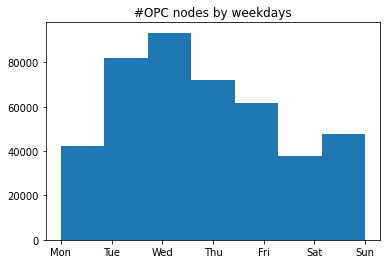

In [35]:
# plt.hist(wdays, bins=7)
# title = '#OPC nodes by weekdays'
# plt.title(title)
# plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
# # plt.xticks(rotation=90)
# plt.savefig(title+'.png', dpi=200)

#### 8. Plot overall OPC nodes by months.

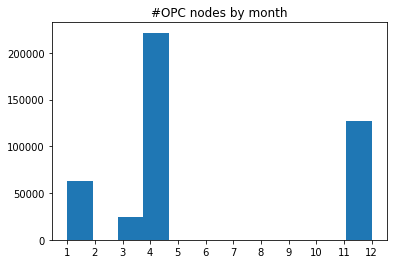

In [17]:
# month_counter = Counter(months)
# plt.hist(months, bins=12)
# title = '#OPC nodes by month'
# plt.title(title)
# plt.xticks(np.arange(1, 13, 1.0))
# plt.savefig(title+'.png', dpi=200)

In [16]:
month_counter

Counter({12: 127158, 1: 62994, 3: 24897, 4: 221423})

In [21]:
wdays_counter

Counter({1: 81994, 2: 93336, 3: 72131, 4: 61559, 5: 37594, 6: 47477, 0: 42381})